# **Graduate Admission Prediction using MLP**

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Dataset

In [2]:
data = pd.read_csv('/kaggle/input/graduates-admission-prediction/admission_data.csv')
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
data.info()  # No non-numbers values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [5]:
data.iloc[:,0:-1]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [6]:
data.iloc[:,-1]

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

### Split into Variable and Targets

In [7]:
# Different wayss of slicing
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

### Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=108)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((350, 7), (150, 7), (350,), (150,))

### Scaling the Data

In [9]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

train_x_scale = scale.fit_transform(train_x)
test_x_scale = scale.fit_transform(test_x)

### Model Building

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu,linear
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(1,activation='linear'))

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In [12]:
from keras.losses import mean_squared_error
from keras.optimizers import Adam

model.compile(loss='mean_squared_error',optimizer='Adam')

hist = model.fit(train_x_scale,train_y,epochs=15,validation_split=0.2)

Epoch 1/15
9/9 [==============================] - 1s 30ms/step - loss: 0.5818 - val_loss: 0.5400
Epoch 2/15
9/9 [==============================] - 0s 6ms/step - loss: 0.5566 - val_loss: 0.5165
Epoch 3/15
9/9 [==============================] - 0s 6ms/step - loss: 0.5309 - val_loss: 0.4917
Epoch 4/15
9/9 [==============================] - 0s 6ms/step - loss: 0.5031 - val_loss: 0.4613
Epoch 5/15
9/9 [==============================] - 0s 5ms/step - loss: 0.4681 - val_loss: 0.4192
Epoch 6/15
9/9 [==============================] - 0s 6ms/step - loss: 0.4192 - val_loss: 0.3649
Epoch 7/15
9/9 [==============================] - 0s 6ms/step - loss: 0.3632 - val_loss: 0.3074
Epoch 8/15
9/9 [==============================] - 0s 5ms/step - loss: 0.3044 - val_loss: 0.2524
Epoch 9/15
9/9 [==============================] - 0s 5ms/step - loss: 0.2485 - val_loss: 0.2022
Epoch 10/15
9/9 [==============================] - 0s 7ms/step - loss: 0.1975 - val_loss: 0.1590
Epoch 11/15
9/9 [=====================

### Predicting the model

In [13]:
y_pred = model.predict(test_x_scale)
#y_pred

5/5 [==============================] - 0s 2ms/step


### Evaluation Metrics

In [14]:
from sklearn.metrics import r2_score

print(r2_score(test_y,y_pred))

-1.289034164503362


#### Plotting the Loss

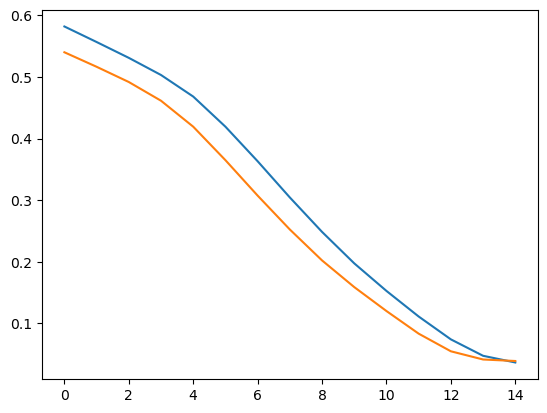

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

### Upgrade the Model

In [16]:
model_2 = Sequential()
model_2.add(Dense(15,activation='relu',input_dim=7))
model_2.add(Dense(15,activation='relu'))
model_2.add(Dense(1,activation='linear'))

In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 15)                120       
                                                                 
 dense_3 (Dense)             (None, 15)                240       
                                                                 
 dense_4 (Dense)             (None, 1)                 16        
                                                                 
Total params: 376
Trainable params: 376
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='mean_squared_error',optimizer='Adam')

hist_2 = model.fit(train_x_scale,train_y,epochs=30,validation_split=0.2)

Epoch 1/30
9/9 [==============================] - 1s 20ms/step - loss: 0.0342 - val_loss: 0.0352
Epoch 2/30
9/9 [==============================] - 0s 5ms/step - loss: 0.0308 - val_loss: 0.0320
Epoch 3/30
9/9 [==============================] - 0s 5ms/step - loss: 0.0282 - val_loss: 0.0291
Epoch 4/30
9/9 [==============================] - 0s 5ms/step - loss: 0.0256 - val_loss: 0.0264
Epoch 5/30
9/9 [==============================] - 0s 7ms/step - loss: 0.0234 - val_loss: 0.0240
Epoch 6/30
9/9 [==============================] - 0s 6ms/step - loss: 0.0213 - val_loss: 0.0216
Epoch 7/30
9/9 [==============================] - 0s 6ms/step - loss: 0.0195 - val_loss: 0.0194
Epoch 8/30
9/9 [==============================] - 0s 6ms/step - loss: 0.0179 - val_loss: 0.0178
Epoch 9/30
9/9 [==============================] - 0s 8ms/step - loss: 0.0165 - val_loss: 0.0160
Epoch 10/30
9/9 [==============================] - 0s 5ms/step - loss: 0.0154 - val_loss: 0.0144
Epoch 11/30
9/9 [=====================

##### DL models always tend more to Overfitting

In [19]:
y_pred = model_2.predict(test_x_scale)
r2_score(test_y,y_pred)

5/5 [==============================] - 0s 2ms/step


-16.650790782615033

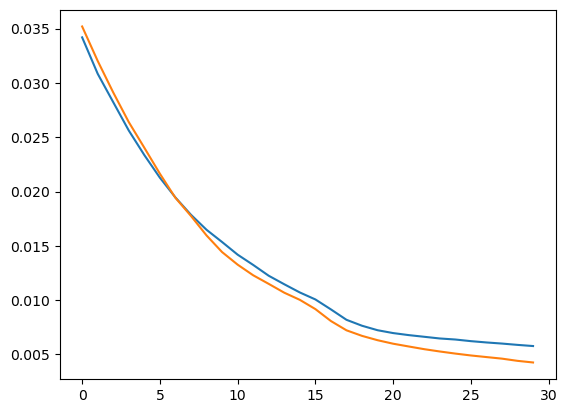

In [20]:
import matplotlib.pyplot as plt
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])